### Video Game Sales

#### Data Diri

**Nama:** Bayu Setiawan

**NIM:** 026

#### Penjelasan Singkat
Dataset penjualan video game dari berbagai *platform* 

[Sumber bisa dilihat di sini](https://www.kaggle.com/datasets/gregorut/videogamesales)

##### Tampilan Dataset

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./dataset/vgsales.csv")

df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


##### Visualisasi Data 1: Pembelian Video Game Berdasarkan Tahun

Pada data di bawah ditunjukkan data penjualan video game dari tahun ke tahun. Kita dapat melihat *trend* peningkatan di tahun 2000 ke atas. Adapun penurunan yang terjadi pada tahun 2010 ke atas dikarenakan kurangnya total data video game yang sangat jelas menyebabkan sedikitnya penjualan.


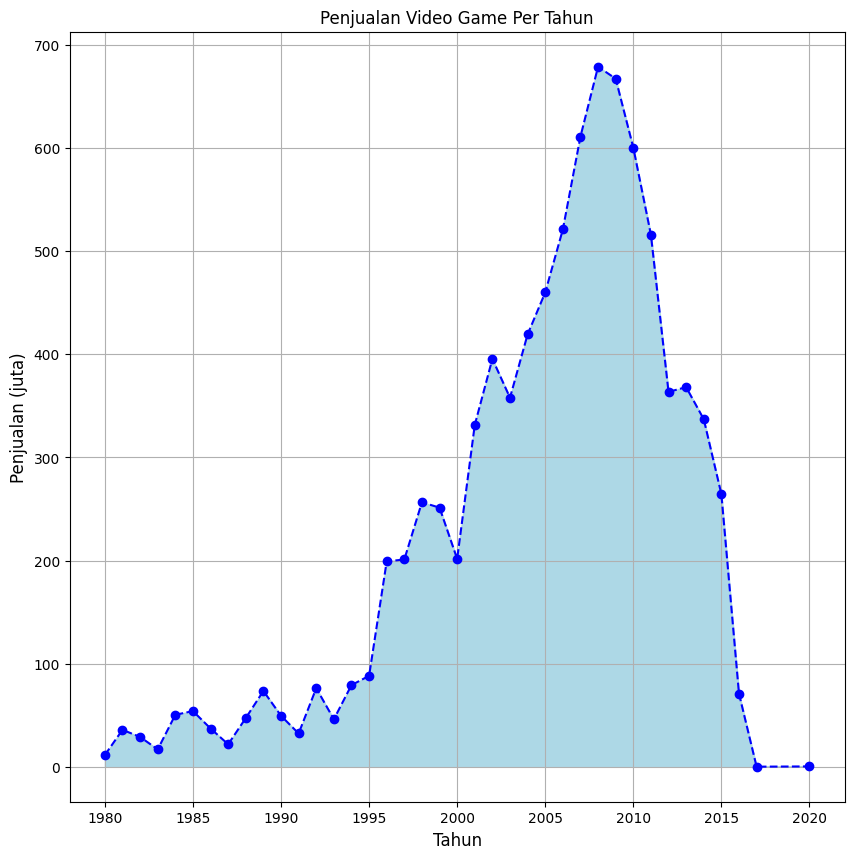

In [100]:
years = df.dropna(subset=['Year']).sort_values(by=['Year'])['Year'].unique()

sales = df.groupby(['Year'])['Global_Sales'].sum()

plt.plot(years, sales, linestyle='--', marker='o', color='blue')

plt.grid()
plt.title('Penjualan Video Game Per Tahun')
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Penjualan (juta)', fontsize=12)
plt.fill_between(years, sales, color='lightblue')


plt.show()



##### Visualisasi Data 2: Jumlah Video Game Berdasarkan *Platform*

Terdapat berbagai macam *platform* game yang tercatat di dataset, ada beberapa nama yang sudah sering kita dengar ada yang sama sekali asing. Dapat dilihat bahwa **DS** dari Nintendo adalah platform paling populer yang diikuti oleh **PS2** dari Sony yang terpaut dua game saja. Adapun *platform* paling sedikit adalah **PC-FX** buatan NEC dan **GG** dari SEGA yang sama-sama hanya memiliki satu buah game.


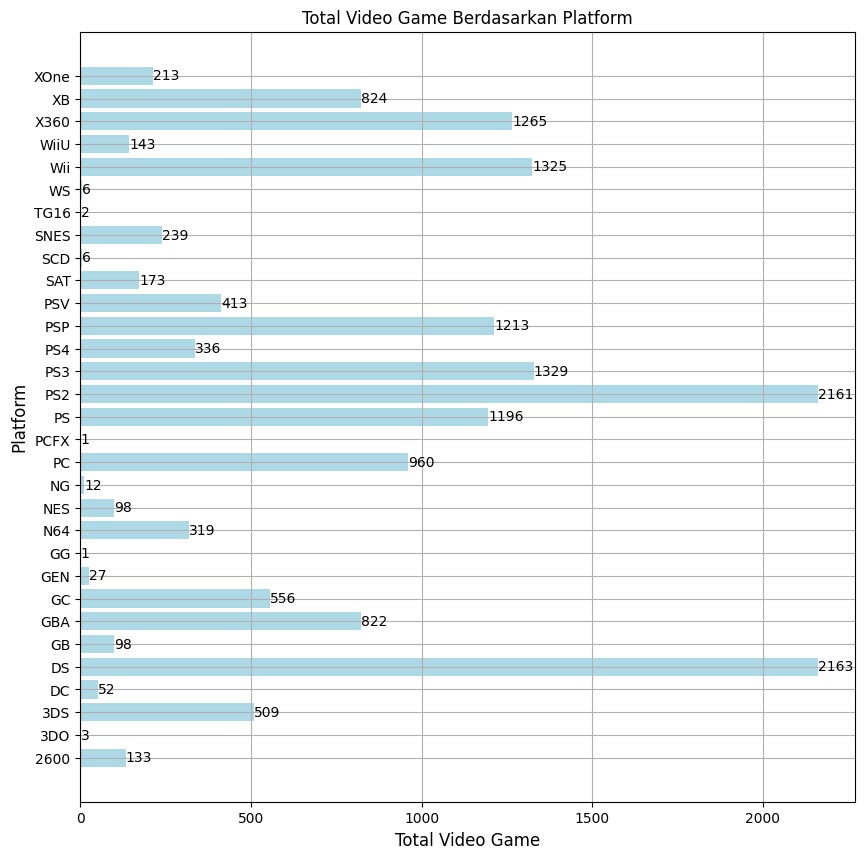

In [153]:
platforms = df.dropna(subset=['Platform']).sort_values(by=['Platform'])['Platform'].unique()

total = df.groupby(['Platform'])['Name'].count()

fig, ax = plt.subplots()  
bars = ax.barh(platforms, total, color='lightblue')

ax.grid()
ax.set_title('Total Video Game Berdasarkan Platform')
ax.set_xlabel('Total Video Game', fontsize=12)
ax.set_ylabel('Platform', fontsize=12)


ax.bar_label(bars)
plt.show()

##### Visualisasi Data 3: Total Video Game Berdasarkan Genre

Pada data di bawah ditunjukkan data total video game berdasarkan genrenya. Dapat dilihat bahwa genre **Action** menjadi genre yang paling banyak memiliki jumlah video game, yang diikuti oleh genre **Sports**. Hal ini kemungkinan dikarenakan oleh mayoritas penikmat video game bergender pria yang memiliki kecenderungan senang dengan aksi dan olahraga. 

Kemungkinan lainnya adalah karena genre **Action** bisa mencakup banyak video game dikarenakan tidak terlalu spesifik dalam pengelompokkan data.

Adapun 3 genre yang memiliki jumlah terendah adalah: **Fighting**, **Strategy**, **Puzzle**

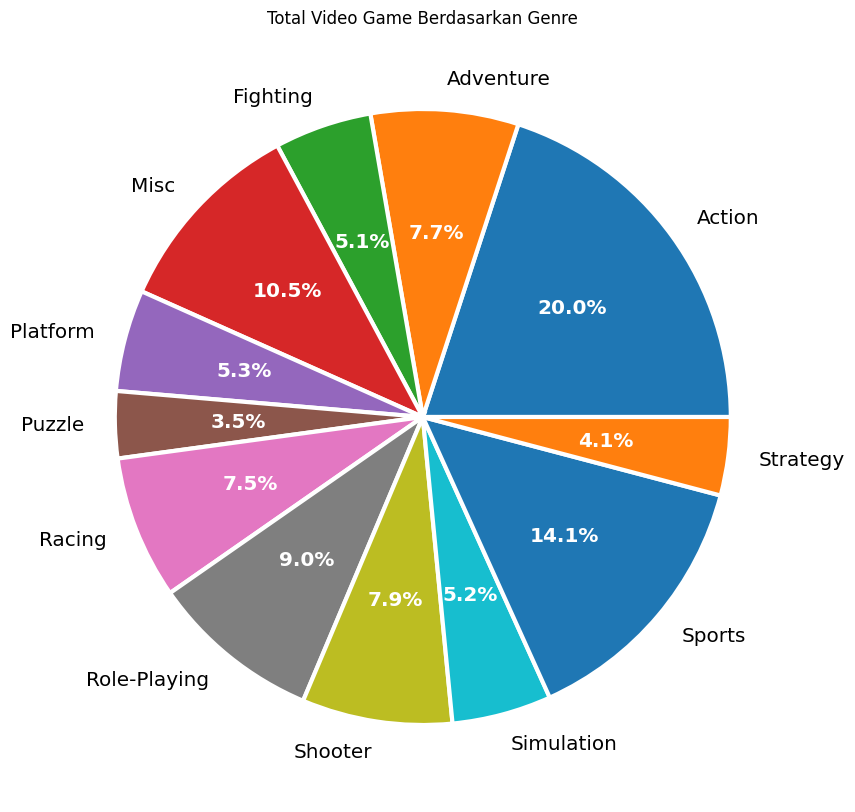

In [136]:
genres = df.dropna(subset=['Genre']).sort_values(by=['Genre'])['Genre'].unique()

total = df.groupby(['Genre'])['Name'].count()

patches, texts, pcts = plt.pie(total, labels=genres, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})

plt.title('Total Video Game Berdasarkan Genre')
plt.setp(pcts, color='white', fontweight='bold')
plt.show()